In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# import files

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [2]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = train['label']

In [4]:
train.drop('label',axis=1,inplace=True)

In [5]:
image_0 = train.iloc[0]

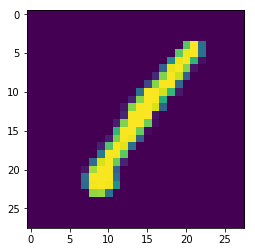

In [6]:
plt.imshow(np.array(image_0).reshape(28,28))

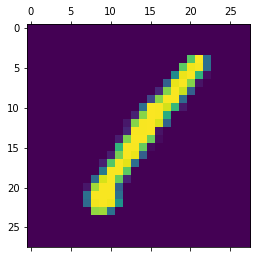

In [7]:
plt.matshow(np.array(image_0).reshape(28,28))

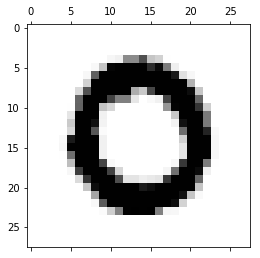

In [8]:
plt.matshow(np.array(train.iloc[1]).reshape(28,28),cmap='Greys')

In [9]:
# we have found out how to see the images

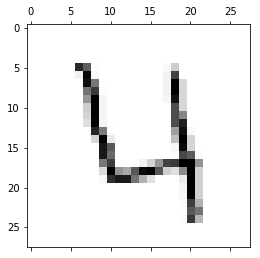

In [10]:
plt.matshow(np.array(train.iloc[3]).reshape(28,28),cmap='Greys')

In [11]:
y.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

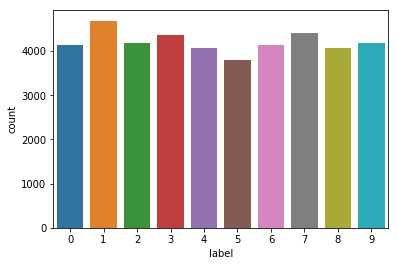

In [12]:
sns.countplot(y)

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [14]:
from sklearn.model_selection import train_test_split

In [17]:
X = train.copy()

In [19]:
X = X / 255.0

In [20]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [42]:
# setup the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(784,)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [46]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [47]:
print("input shape ",model.input_shape)
print("output shape ",model.output_shape)

input shape  (None, 784)
output shape  (None, 10)


In [48]:
X.shape

(42000, 784)

In [49]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
33600/33600 [==============================] - 6s 176us/sample - loss: 0.3212 - acc: 0.9097
Epoch 2/5
33600/33600 [==============================] - 4s 121us/sample - loss: 0.1435 - acc: 0.9574
Epoch 3/5
33600/33600 [==============================] - 4s 120us/sample - loss: 0.0982 - acc: 0.9711
Epoch 4/5
33600/33600 [==============================] - 5s 136us/sample - loss: 0.0725 - acc: 0.9782
Epoch 5/5
33600/33600 [==============================] - 4s 121us/sample - loss: 0.0551 - acc: 0.9834


In [50]:
pred = model.predict(X_valid)

In [52]:
pred[0]

array([5.0380269e-05, 2.6194431e-07, 4.5148092e-05, 3.2989234e-01,
       4.1678788e-08, 6.6228169e-01, 8.6239559e-08, 2.1639742e-07,
       8.3497143e-04, 6.8949065e-03], dtype=float32)

In [53]:
pred[1]

array([2.3160442e-06, 1.7308459e-10, 1.8953284e-05, 7.8791729e-08,
       4.4625787e-05, 1.5075962e-06, 9.9993217e-01, 2.2016994e-07,
       1.7578824e-07, 4.8724452e-08], dtype=float32)

In [54]:
np.argmax(pred[0])

5

In [57]:
y_valid.head()

16275    3
19204    6
18518    9
25780    5
16228    6
Name: label, dtype: int64

In [58]:
np.argmax(pred[1])

6

In [59]:
np.argmax(pred[2])

9

In [64]:
pred[0]

array([5.0380269e-05, 2.6194431e-07, 4.5148092e-05, 3.2989234e-01,
       4.1678788e-08, 6.6228169e-01, 8.6239559e-08, 2.1639742e-07,
       8.3497143e-04, 6.8949065e-03], dtype=float32)

In [66]:
pred.size

84000

In [68]:
pred.shape

(8400, 10)

In [67]:
pred[0:3]

array([[5.0380269e-05, 2.6194431e-07, 4.5148092e-05, 3.2989234e-01,
        4.1678788e-08, 6.6228169e-01, 8.6239559e-08, 2.1639742e-07,
        8.3497143e-04, 6.8949065e-03],
       [2.3160442e-06, 1.7308459e-10, 1.8953284e-05, 7.8791729e-08,
        4.4625787e-05, 1.5075962e-06, 9.9993217e-01, 2.2016994e-07,
        1.7578824e-07, 4.8724452e-08],
       [1.6402465e-10, 1.8172458e-11, 1.6431312e-09, 4.0884570e-05,
        1.9587207e-05, 6.2681956e-08, 3.7381922e-13, 2.7549595e-05,
        5.8377555e-06, 9.9990606e-01]], dtype=float32)

In [71]:
pred_actual = np.zeros(8400)

for i in np.arange(8400):
    pred_actual[i] = np.argmax(pred[i])    

In [72]:
pred_actual[2]

9.0

In [74]:
y_valid.head()

16275    3
19204    6
18518    9
25780    5
16228    6
Name: label, dtype: int64

In [86]:
c = y_valid.values

In [87]:
c

array([3, 6, 9, ..., 2, 7, 2], dtype=int64)

In [88]:
c[0:10]

array([3, 6, 9, 5, 6, 5, 6, 0, 0, 1], dtype=int64)

In [89]:
pred_actual[0:10]

array([5., 6., 9., 5., 6., 5., 6., 0., 0., 1.])

In [90]:
correct = 0

for i in np.arange(8400):
    if (c[i] == pred_actual[i]):
        correct = correct + 1

In [91]:
correct

8140

In [92]:
false = 8400 - correct

In [93]:
false

260

In [94]:
(correct*100)/8400

96.9047619047619

In [ ]:
# We have 96.9% accuracy on our first attempt, let us now try to improve this